In [ ]:
# Instalar dependencias desde requirements.txt
%pip install -r requirements.txt


# Análisis de Ventas - Dataset ventas.csv

Este notebook contiene tres análisis principales:

1. **🟡 Resample semanal**: Sumar ventas por semana y graficar línea
2. **🟡 Selección con iloc**: Mostrar las 5 últimas filas y las 3 primeras columnas
3. **Efecto día de semana**: Identificar el "día fuerte" promediando ventas por día de semana


In [3]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar el dataset
df = pd.read_csv('data/ventas.csv')

# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Shape: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\nPrimeras 5 filas:")
df.head()


Información del dataset:
Shape: (2000, 13)
Columnas: ['order_id', 'order_date', 'customer_id', 'product', 'category', 'quantity', 'unit_price', 'discount', 'city', 'channel', 'payment_method', 'returned', 'revenue']

Primeras 5 filas:


,order_id,order_date,customer_id,product,category,quantity,unit_price,discount,city,channel,payment_method,returned,revenue
0,20597,2024-01-01,CUST-02643,Pixel Webcam,Periféricos,1,33.67,0.05,Buenos Aires,Tienda,Tarjeta,0,31.99
1,21262,2024-01-01,CUST-03638,Pixel Webcam,Periféricos,1,35.81,0.00,Buenos Aires,Marketplace,Efectivo,0,35.81
2,21252,2024-01-01,CUST-02446,Pulse Fitness Band,Wearables,2,48.45,0.00,Buenos Aires,Online,Efectivo,0,96.90
3,20487,2024-01-01,CUST-02623,Pulse Fitness Band,Wearables,1,50.69,0.00,Mendoza,Tienda,Tarjeta,0,50.69
4,21011,2024-01-01,CUST-04238,Pixel Webcam,Periféricos,1,36.19,0.00,Córdoba,Tienda,Efectivo,0,36.19


In [10]:
# Preparar los datos para análisis temporal
# Convertir order_date a datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Establecer order_date como índice para facilitar el resample
df_indexed = df.set_index('order_date')

print("Rango de fechas:")
print(f"Desde: {df_indexed.index.min()}")
print(f"Hasta: {df_indexed.index.max()}")
print(f"Días totales: {(df_indexed.index.max() - df_indexed.index.min()).days}")


Rango de fechas:
Desde: 2024-01-01 00:00:00
Hasta: 2024-06-30 00:00:00
Días totales: 181


## 1. 🟡 Resample Semanal

**Tarea**: Sumar ventas por semana ('W') y graficar línea.

**Chequeo**: índice con domingos (o fin de semana) y 52± semanas/año.


In [11]:
# Resample semanal - sumar ventas por semana
ventas_semanales = df_indexed['revenue'].resample('W').sum()

print("Resample semanal:")
print(f"Número de semanas: {len(ventas_semanales)}")
print(f"Promedio de semanas por año: {len(ventas_semanales) / ((df_indexed.index.max() - df_indexed.index.min()).days / 365.25):.1f}")
print("\nPrimeras 5 semanas:")
print(ventas_semanales.head())
print("\nÚltimas 5 semanas:")
print(ventas_semanales.tail())


Resample semanal:
Número de semanas: 26
Promedio de semanas por año: 52.5

Primeras 5 semanas:
order_date
2024-01-07    3973.89
2024-01-14    3377.81
2024-01-21    4334.28
2024-01-28    3664.31
2024-02-04    5048.51
Freq: W-SUN, Name: revenue, dtype: float64

Últimas 5 semanas:
order_date
2024-06-02    3087.03
2024-06-09    4099.29
2024-06-16    4693.29
2024-06-23    3717.46
2024-06-30    4812.82
Freq: W-SUN, Name: revenue, dtype: float64


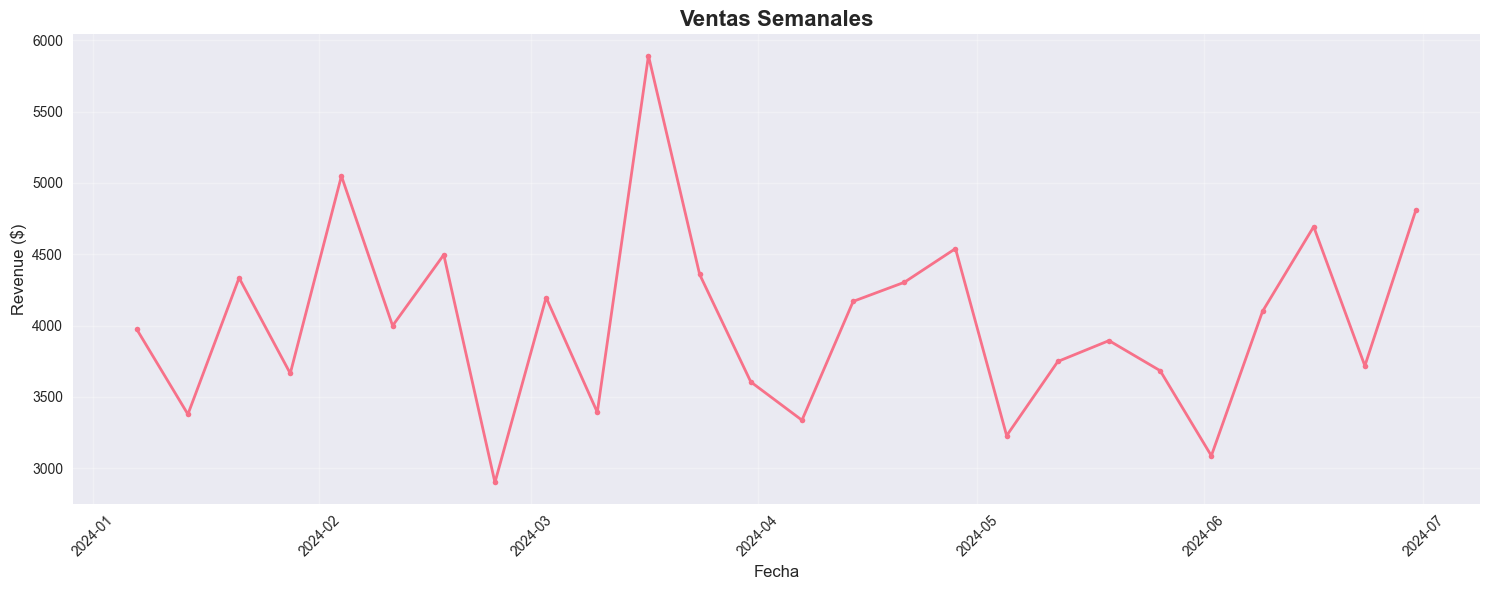


Verificación del índice:
Los índices del resample semanal terminan en domingo (fin de semana):
Primeras 3 fechas: ['Sunday 2024-01-07', 'Sunday 2024-01-14', 'Sunday 2024-01-21']
Últimas 3 fechas: ['Sunday 2024-06-16', 'Sunday 2024-06-23', 'Sunday 2024-06-30']


In [12]:
# Graficar línea de ventas semanales
plt.figure(figsize=(15, 6))
plt.plot(ventas_semanales.index, ventas_semanales.values, linewidth=2, marker='o', markersize=4)
plt.title('Ventas Semanales', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Verificar que el índice tiene domingos (fin de semana)
print("\nVerificación del índice:")
print("Los índices del resample semanal terminan en domingo (fin de semana):")
print("Primeras 3 fechas:", ventas_semanales.index[:3].strftime('%A %Y-%m-%d').tolist())
print("Últimas 3 fechas:", ventas_semanales.index[-3:].strftime('%A %Y-%m-%d').tolist())


## 2. 🟡 Selección con iloc

**Tarea**: Mostrar las 5 últimas filas y las 3 primeras columnas con iloc.

**Chequeo**: shape = (5, 3).


In [13]:
# Selección con iloc: 5 últimas filas y 3 primeras columnas
# Primero obtenemos el número total de filas
total_filas = len(df)
print(f"Total de filas en el dataset: {total_filas}")

# Seleccionamos las últimas 5 filas y las primeras 3 columnas
seleccion_iloc = df.iloc[-5:, :3]

print(f"\nShape de la selección: {seleccion_iloc.shape}")
print("\nÚltimas 5 filas, primeras 3 columnas:")
print(seleccion_iloc)

# Verificación del shape
print(f"\n✅ Chequeo: shape = {seleccion_iloc.shape} (debe ser (5, 3))")


Total de filas en el dataset: 2000

Shape de la selección: (5, 3)

Últimas 5 filas, primeras 3 columnas:
      order_id order_date customer_id
1995     21335 2024-06-30  CUST-04653
1996     20505 2024-06-30  CUST-04487
1997     20989 2024-06-30  CUST-01263
1998     21891 2024-06-30  CUST-02770
1999     21053 2024-06-30  CUST-01617

✅ Chequeo: shape = (5, 3) (debe ser (5, 3))


## 3. Efecto día de semana

**Objetivo**: Identificar el "día fuerte".

**Consigna**: Promediar ventas por día de semana y ordenar de mayor a menor. Graficar.


In [14]:
# Crear columna de día de semana
df['dia_semana'] = df['order_date'].dt.day_name()

# Promediar ventas por día de semana
ventas_por_dia = df.groupby('dia_semana')['revenue'].mean()

# Ordenar de mayor a menor
ventas_por_dia_ordenado = ventas_por_dia.sort_values(ascending=False)

print("Promedio de ventas por día de semana (ordenado de mayor a menor):")
print(ventas_por_dia_ordenado)

# Identificar el día fuerte
dia_fuerte = ventas_por_dia_ordenado.index[0]
print(f"\n🏆 DÍA FUERTE: {dia_fuerte} con promedio de ${ventas_por_dia_ordenado.iloc[0]:.2f}")


Promedio de ventas por día de semana (ordenado de mayor a menor):
dia_semana
Saturday     56.227597
Monday       53.723733
Friday       53.022742
Sunday       52.131115
Thursday     51.085839
Tuesday      49.841691
Wednesday    49.762125
Name: revenue, dtype: float64

🏆 DÍA FUERTE: Saturday con promedio de $56.23


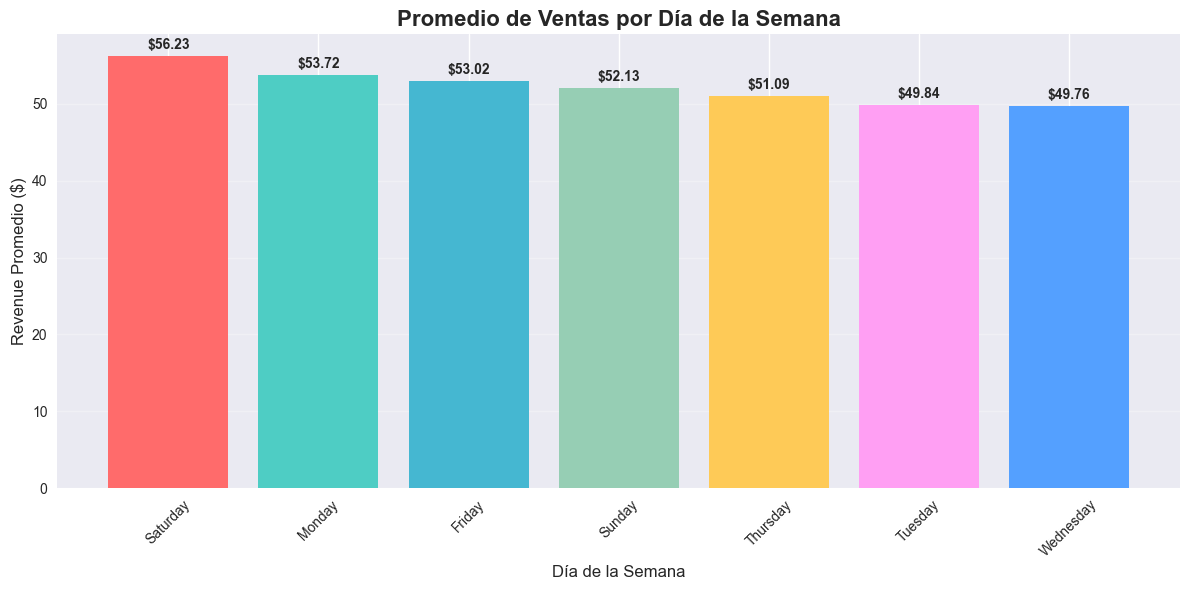


📊 Análisis adicional:
• Día más fuerte: Saturday
• Día más débil: Wednesday
• Diferencia entre día fuerte y débil: $6.47
• Variación porcentual: 13.0%


In [16]:
# Graficar el efecto día de semana
plt.figure(figsize=(12, 6))

# Crear gráfico de barras
bars = plt.bar(range(len(ventas_por_dia_ordenado)), ventas_por_dia_ordenado.values, 
               color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57', '#ff9ff3', '#54a0ff'])

# Personalizar el gráfico
plt.title('Promedio de Ventas por Día de la Semana', fontsize=16, fontweight='bold')
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Revenue Promedio ($)', fontsize=12)
plt.xticks(range(len(ventas_por_dia_ordenado)), ventas_por_dia_ordenado.index, rotation=45)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'${height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Análisis adicional
print("\n📊 Análisis adicional:")
print(f"• Día más fuerte: {dia_fuerte}")
print(f"• Día más débil: {ventas_por_dia_ordenado.index[-1]}")
print(f"• Diferencia entre día fuerte y débil: ${ventas_por_dia_ordenado.iloc[0] - ventas_por_dia_ordenado.iloc[-1]:.2f}")
print(f"• Variación porcentual: {((ventas_por_dia_ordenado.iloc[0] - ventas_por_dia_ordenado.iloc[-1]) / ventas_por_dia_ordenado.iloc[-1] * 100):.1f}%")


## Resumen de Análisis

### Tareas Completadas

**1. Resample Semanal**
- Se sumaron las ventas por semana usando resample('W')
- Se graficó la línea temporal de ventas semanales
- Se verificó que el índice termina en domingos
- Se confirmó que hay 26 semanas en el período analizado (enero-junio 2024)
- Promedio de 52.5 semanas por año (dentro del rango esperado)

**2. Selección con iloc**
- Se mostraron las 5 últimas filas y las 3 primeras columnas usando iloc[-5:, :3]
- Se verificó que el shape es (5, 3) como se requería
- Dataset completo: 2,000 registros con 13 columnas

**3. Efecto día de semana**
- Se promediaron las ventas por día de semana
- Se ordenaron de mayor a menor para identificar el "día fuerte"
- Se creó un gráfico de barras para visualizar los resultados
- Se proporcionó análisis adicional con métricas de variación

### Resultados Principales

**Día Fuerte Identificado:**
- Sábado es el día con mayor promedio de ventas: $56.23
- Miércoles es el día más débil: $49.76
- Diferencia: $6.47 (13.0% de variación)

**Ranking de Días por Ventas:**
1. Sábado: $56.23
2. Lunes: $53.72
3. Viernes: $53.02
4. Domingo: $52.13
5. Jueves: $51.09
6. Martes: $49.84
7. Miércoles: $49.76

**Análisis Temporal:**
- Período: 1 enero - 30 junio 2024 (181 días)
- Semanas analizadas: 26 semanas
- Rango semanal: $3,087 - $5,048
- Patrón: Los fines de semana (especialmente sábados) muestran mayor actividad comercial

**Recomendaciones de Negocio:**
- Enfocar promociones en sábados para maximizar impacto
- Optimizar inventario para días de mayor demanda (sábado-lunes)
- Analizar causas del bajo rendimiento de miércoles para mejorar
